### Import and load data

In [9]:
import pandas as pd
from numpy import nan
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats
%matplotlib inline

path = 'data'

fn = os.path.join('..', path, "baseball_stats.xls")
df = pd.read_excel(fn, usecols="A:M")

### Have a look at the raw data and a couple stats

mean 8.29
std 4.29
original NormaltestResult(statistic=27.322761595776385, pvalue=1.1666422605455809e-06)


<AxesSubplot:>

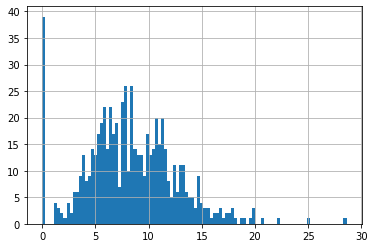

In [10]:
ser = df['bb_pct']

print("mean", round(ser.mean(), 2))
print("std",  round(ser.std(), 2))
print('original', stats.normaltest(ser))

ser.hist(bins=100)

###  prune outliers

mean 8.68
std 3.56


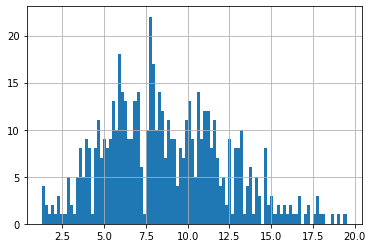

In [11]:
fixed_ser = ser[(ser > 0) & (ser < 20)]
fixed_ser.hist(bins=100)

print("mean", round(fixed_ser.mean(), 2))
print("std",  round(fixed_ser.std(), 2))

In [12]:
print('fixed', stats.normaltest(fixed_ser))

fixed NormaltestResult(statistic=16.739730736631476, pvalue=0.0002317467520934554)


<AxesSubplot:>

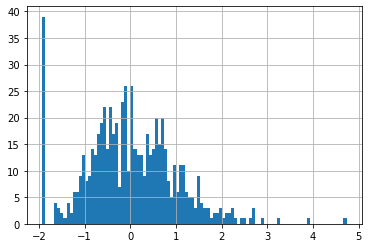

In [13]:
# standardize the data
mean = ser.mean()
stdev = ser.std()
norm = (ser-mean)/stdev
norm.hist(bins=100)

<AxesSubplot:>

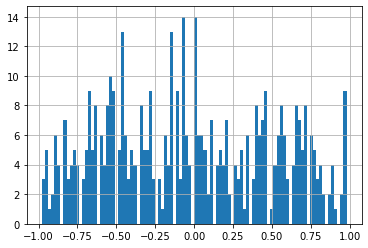

In [14]:
# make a 3-sigma mask
bmask = norm[(abs(norm) < 1)]
new_norm = norm[bmask.index]
new_norm.hist(bins=100)

mean 8.16
std 2.28
original NormaltestResult(statistic=155.25013765943942, pvalue=1.940264554501849e-34)


<AxesSubplot:>

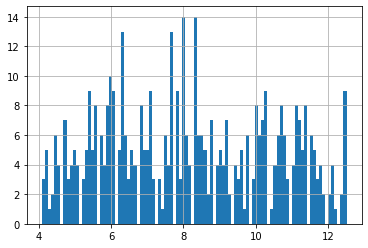

In [15]:
pruned_ser = ser[new_norm.index]

print("mean", round(pruned_ser.mean(), 2))
print("std",  round(pruned_ser.std(), 2))
print('original', stats.normaltest(pruned_ser))
pruned_ser.hist(bins=100)

<AxesSubplot:>

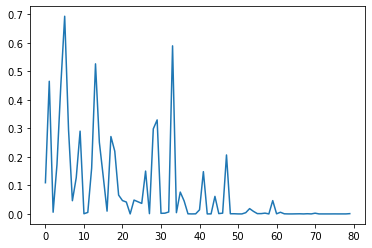

In [16]:
# how does n affect normalicy stats?  
results = []

# Run the normalicy test with samples of different sizes
for n in [x for x in range(20, 100, 1)]:
    _, p = stats.normaltest(pruned_ser.sample(n))
    results.append(p)
    
# Have a look    
s = pd.Series(ls)
s.plot.line()